<a href="https://colab.research.google.com/github/Jaguar838/ml-zoomcamp/blob/master/HW/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3

> Note: sometimes your answer doesn't match one of the options exactly.
> That's fine.
> Select the option that's closest to your solution.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mutual_info_score
pd.__version__

'2.2.3'

### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [ ]:
# завантажити дані напряму за допомогою Pandas
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
df_original = pd.read_csv(url)
df_original.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [ ]:
columns = df_original.columns.to_list()
columns

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score',
 'converted']

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [ ]:
# Вибираємо колонки з типом 'object'
categorical = df_original.select_dtypes(include=['object']).columns
categorical

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [ ]:
# Заповнюємо пропущені значення в цих колонках на 'NA'
df_original[categorical] = df_original[categorical].fillna('NA')

In [ ]:
df_original['annual_income'].isnull().sum()

np.int64(181)

In [ ]:
df_original['annual_income'] = df_original['annual_income'].fillna(0.0)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

In [ ]:
df_original['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [ ]:
mode_industry = df_original['industry'].mode()[0]
print(f"Найбільш часте значення: {mode_industry}")
print(f"Кількість: {len(df_original[df_original['industry']==mode_industry])}")

Найбільш часте значення: retail
Кількість: 203


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

In [ ]:
# Знаходимо числові колонки (типу int або float)
numerical_features = df_original.select_dtypes(include=['int64', 'float64']).columns

# Створюємо кореляційну матрицю для цих колонок
correlation_matrix = df_original[numerical_features].corr().round(4)

# Виводимо кореляційну матрицю
correlation_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.0000,0.0098,-0.0236,-0.0049,0.4359
annual_income,0.0098,1.0000,0.0270,0.0156,0.0531
interaction_count,-0.0236,0.0270,1.0000,0.0099,0.3746
lead_score,-0.0049,0.0156,0.0099,1.0000,0.1937
converted,0.4359,0.0531,0.3746,0.1937,1.0000


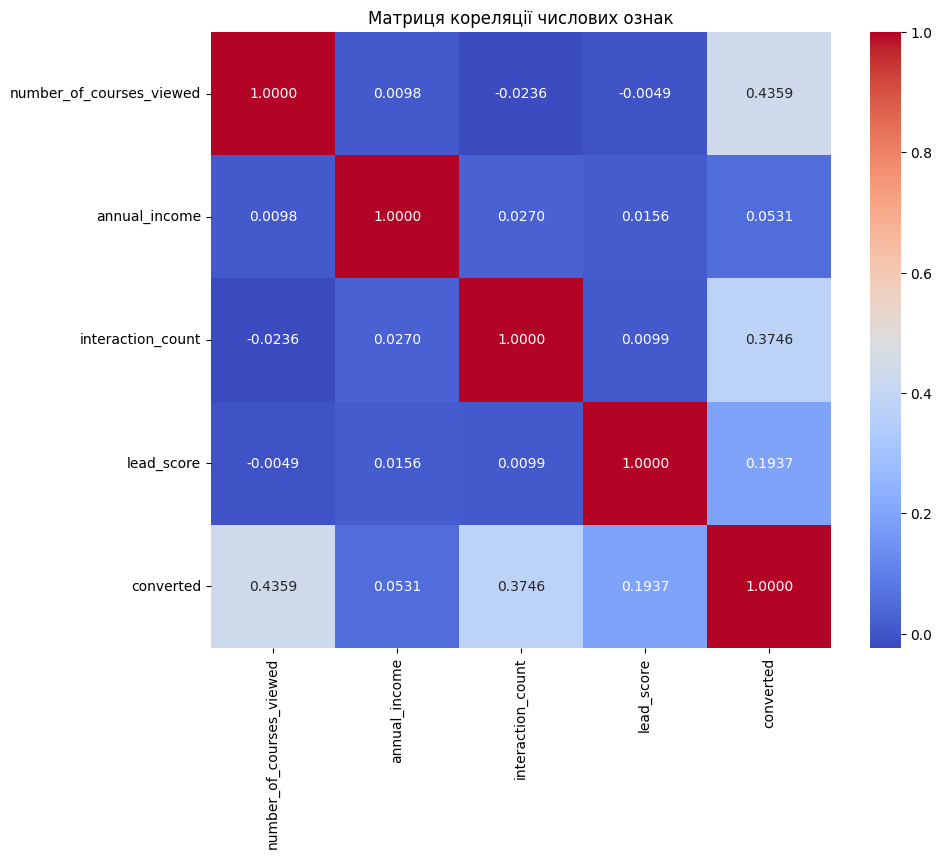

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Матриця кореляції числових ознак')
plt.show()

In [ ]:
# Get the correlation for the given pairs
pairs = [
    ('interaction_count', 'lead_score'),
    ('number_of_courses_viewed', 'lead_score'),
    ('number_of_courses_viewed', 'interaction_count'),
    ('annual_income', 'interaction_count')
]

max_corr = 0
best_pair = None

print("Correlation values for the given pairs:")
for pair in pairs:
    # Get the absolute correlation value
    corr = abs(correlation_matrix.loc[pair[0], pair[1]])
    print(f"- Correlation between '{pair[0]}' and '{pair[1]}': {corr:.4f}")
    if corr > max_corr:
        max_corr = corr
        best_pair = pair

print(f"\nThe pair with the highest correlation is: '{best_pair[0]}' and '{best_pair[1]}'")

Correlation values for the given pairs:
- Correlation between 'interaction_count' and 'lead_score': 0.0099
- Correlation between 'number_of_courses_viewed' and 'lead_score': 0.0049
- Correlation between 'number_of_courses_viewed' and 'interaction_count': 0.0236
- Correlation between 'annual_income' and 'interaction_count': 0.0270

The pair with the highest correlation is: 'annual_income' and 'interaction_count'


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [ ]:
# Розділяємо дані на навчальний набір (60%) і тимчасовий набір (40%)
# shuffle=True є стандартним, а random_state забезпечує відтворюваність

df_train, df_temp = train_test_split(df_original, test_size=0.4, random_state=42)

# Тепер розділяємо тимчасовий набір (40%) на валідаційний (20%) і тестовий (20%)
# 0.5 * 0.4 = 0.2, тому test_size=0.5
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Перевіряємо розміри наборів
print(f"Кількість записів у початковому наборі: {len(df_original)}")
print(f"Розмір навчального набору: {len(df_train)}")
print(f"Розмір валідаційного набору: {len(df_val)}")
print(f"Розмір тестового набору: {len(df_test)}")

# Можете переглянути перші декілька рядків кожного набору
print("\nНавчальний набір (перші 3 рядки):")
df_train.head(3)

Кількість записів у початковому наборі: 1462
Розмір навчального набору: 877
Розмір валідаційного набору: 292
Розмір тестового набору: 293

Навчальний набір (перші 3 рядки):


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,referral,finance,1,61705.0,unemployed,south_america,4,0.65,1
1,referral,education,1,55199.0,employed,south_america,4,0.09,1
2,referral,retail,1,40841.0,self_employed,africa,4,0.61,1


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [ ]:
### Питання 3

* Обчисліть показник взаємної інформації між `y` та іншими категоріальними змінними в наборі даних. Використовуйте лише навчальний набір.
* Округліть результати до 2 десяткових знаків за допомогою `round(score, 2)`.

Яка з цих змінних має найбільший показник взаємної інформації?

- `industry`
- `location`
- `lead_source`
- `employment_status`

In [ ]:
# Вибираємо категоріальні стовпці з навчального набору
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Створюємо функцію для розрахунку MI
def calculate_mi(series):
    return mutual_info_score(series, y_train)

# Застосовуємо функцію до кожного категоріального стовпця
mi_scores = X_train[categorical_cols].apply(calculate_mi)

# Сортуємо результати та округлюємо до 2 знаків
mi_scores = mi_scores.sort_values(ascending=False).round(2)

# Виводимо результати
print("Показники взаємної інформації для категоріальних змінних:")
print(mi_scores)

Показники взаємної інформації для категоріальних змінних:
lead_source          0.03
employment_status    0.02
industry             0.02
location             0.00
dtype: float64


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

In [ ]:
# Назва цільової змінної
target = 'converted'
# Розділяємо тренувальний набір
y_train = df_train[target]
X_train = df_train.drop(target, axis=1)
# Розділяємо валідаційний набір
y_val = df_val[target]
X_val = df_val.drop(target, axis=1)
# Розділяємо тестовий набір
y_test = df_test[target]
X_test = df_test.drop(target, axis=1)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

### Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.